# Simple Regression Problem

Solve simple Linear Regression problem with Numpy and PyTorch.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn

np.random.seed(42)
plt.style.use('seaborn-v0_8')

Generate sample data and split into train and test set:

In [2]:
x = np.random.rand(100, 1)
y = 2*x + 1 + 0.1*np.random.randn(100, 1)

# Split into train and validation set
idx = np.arange(100)
np.random.shuffle(idx)
train_idx = idx[:80]
val_idx = idx[80:]
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

Solve with Numpy:

m = 1.9689637779075786
b = 1.023541108611822


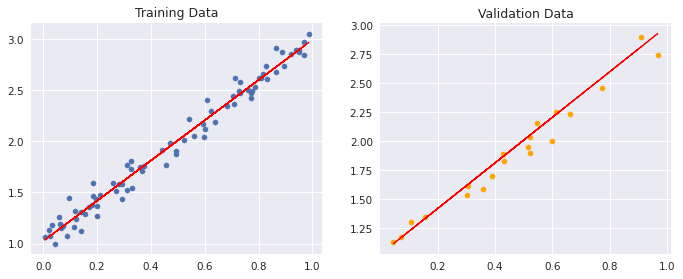

In [3]:
m = np.random.randn()
b = np.random.randn()
epochs = 1000
learning_rate = 0.1

for _ in range(epochs):
    y_pred = b + m * x_train 
    error = y_pred - y_train
    dm = 2 * (x_train * error).mean()
    db = 2 * error.mean()
    m = m - learning_rate * dm
    b = b - learning_rate * db

print(f'm = {m}')
print(f'b = {b}')

# Visualize the result
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4), dpi=75)
ax1.set_title('Training Data')
ax1.plot(x_train, (m*x_train+b), color='red', linewidth=1)
ax1.scatter(x_train, y_train, s=25)
ax2.set_title('Validation Data')
ax2.plot(x_val, (m*x_val+b), color='red', linewidth=1)
ax2.scatter(x_val, y_val, c='orange', s=25)
plt.show()

Solve with PyTorch:

In [4]:
torch.manual_seed(42)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

x_train2 = torch.from_numpy(x_train).float().to(device)
y_train2 = torch.from_numpy(y_train).float().to(device)
x_val2 = torch.from_numpy(x_val).float().to(device)
y_val2 = torch.from_numpy(y_val).float().to(device)

m = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

epochs = 1000
learning_rate = 1e-1

for _ in range(epochs):
    y_pred = b + m * x_train2
    error = y_pred - y_train2
    loss = (error ** 2).mean()

    loss.backward()

    with torch.no_grad():
        m -= learning_rate * m.grad
        b -= learning_rate * b.grad

    m.grad.zero_()
    b.grad.zero_()

print(f'm = {m.item()}')
print(f'b = {b.item()}')

m = 1.9689600467681885
b = 1.023543119430542


Visualize the result:

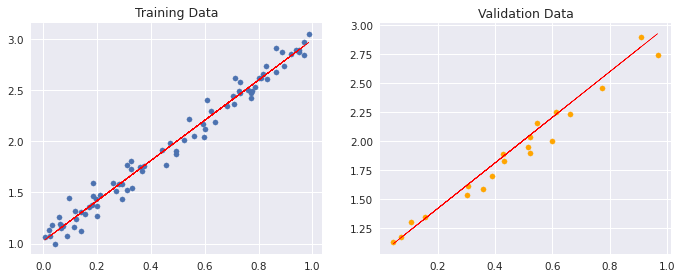

In [13]:
line1 = (b + m * x_train2).cpu().detach().numpy()
line2 = (b + m * x_val2).cpu().detach().numpy()

# Visualize the result
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4), dpi=75)

ax1.set_title('Training Data')
ax1.plot(x_train, line1, color='red', linewidth=0.5)
ax1.scatter(x_train, y_train, s=25)

ax2.set_title('Validation Data')
ax2.plot(x_val, line2, color='red', linewidth=0.5)
ax2.scatter(x_val, y_val, c='orange', s=25)

plt.show()